#### Gathering & Cleaning Data
Crops Yield Data:
Crops yield of ten most consumed crops around the world was downloaded from FAO webiste.The collected data include country, item, year starting from 1961 to 2016 and yield value.

In [1]:
#importing required libraries
import numpy as np 
import pandas as pd 

In [2]:
df_yield = pd.read_csv('C:/Users/USER/Desktop/Projects/Crop-Yield-Prediction/Data/data1/yield.csv')
df_yield.shape

(56717, 12)

In [3]:
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [4]:
df_yield.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826
56716,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2016,2016,hg/ha,18294


Looking at the columns in this dataset, we shall rename `Value` to `hg/ha_yield` to make it easier to recognise that this is our crops yields production value. In addition to this, we shall also do removal of unnecessary coloumns like `Area Code`, `Domain`, `Item Code`, etc.

In [5]:
# rename columns.
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})

In [6]:
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [7]:
# drop unwanted columns.
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [8]:
df_yield.describe()

,Year,hg/ha_yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


In [9]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


There's no missing values

#### Climate Data : Rainfall
Next, we shall load the Climate data: Rainfall

The climatic factors include rainfall and temperature. Similar to abiotic components, such as pesticides and soil, there are environmental factors that influence plant growth and development.

Rainfall has a dramatic effect on agriculture. For this project rain fall per year information was gathered from World Data Bank. Let load it.

In [10]:
df_rain = pd.read_csv('C:/Users/USER/Desktop/Projects/Crop-Yield-Prediction/Data/data1/rainfall.csv')
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [11]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})

In [12]:
# check data types 
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [13]:
# convert average_rain_fall_mm_per_year from object to float
df_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rain['average_rain_fall_mm_per_year'],errors = 'coerce')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


Next, we will drop any empty rows (NAs) from dataset and merge yield dataframe with rain dataframe by year and area columns

In [14]:
df_rain = df_rain.dropna()

In [15]:
df_rain.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


Clearly, the rainfall dataset begins from `1985` and ends at `2017`

In [16]:
# merge yield dataframe with rain dataframe by year and area columns 
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])

We will now view the final shape of the dataframe and info of values:

In [17]:
yield_df.shape

(25385, 5)

In [18]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


We see earlier that the year start from the first yield dataframe (yield) was `1961`. The merged dataset now is `1985` because that's when the rainfall data begins.

In [19]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


#### Pesticides Data:
Pesticides used for each item and country was also collected from FAO database.

We shall also load it.

In [20]:
df_pes = pd.read_csv('C:/Users/USER/Desktop/Projects/Crop-Yield-Prediction/Data/data1/pesticides.csv')
df_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [21]:
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [22]:
df_pes.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [23]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [24]:
# merge Pesticides dataframe with yield dataframe 
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])
yield_df.shape

(18949, 6)

In [25]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


#### Average Temprature:

Average Temprature for each country was colleced from World Bank Data.

Let's load it:

In [26]:
avg_temp=  pd.read_csv('C:/Users/USER/Desktop/Projects/Crop-Yield-Prediction/Data/data1/temp.csv')

In [27]:
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [28]:
avg_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


Now, we see that average temprature starts from `1743` and ends at `2013`, with some empty rows that we have to drop.

In [29]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [30]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [31]:
yield_df.shape

(28242, 7)

In [32]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [33]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [34]:
yield_df.Item.value_counts()

Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: Item, dtype: int64

Great, no missing values! We have now done with the data merging.

#### Data Exploration

Remember: `yield_df` is the final obtained dataset after the merging.|

In [35]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [36]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


It can be noticed the high variance in the values for each columns of the dataset, later on we will account for that by scaling.

In [37]:
yield_df['Area'].nunique()

101

The dataset has 101 Countries. Let's order these by 10 of the highest yield production:

In [38]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

India has the highest yield production in the dataset. Now, let's Include `Item` in the groupby:

In [39]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

India is the highest for production of cassava and potatoes. Potatoes seems to be the dominated crop in the dataset, being the highest in 4  different countries.

Now, we shall explore the relationships between the colunms of the dataframe. A good way to quickly check correlations among columns is by vizualizing the correlation matrix as a heatmap.

In [40]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

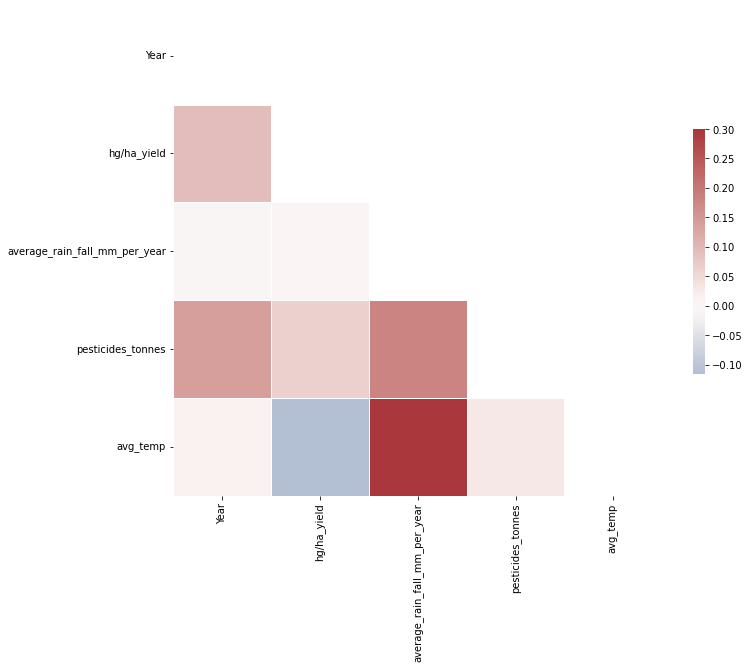

In [41]:
correlation_data=yield_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

It can be seen from the above correlation map that there seem to be no correlation between any of the colmuns in the dataframe. The need for `Data Preprocessing`

#### Data Preprocessing

We now perform a number of data preprocessing on the merged datasets.

##### Encoding Categorical Variables:

In [42]:
cleanup_nums = {'Item':{'Potatoes':0,
           'Maize':1, 
           'Wheat':2, 
           'Rice, paddy':3,
           'Soybeans':4,
           'Sorghum':5,
           'Sweet potatoes':6, 
           'Cassava':7, 
           'Yams':8,
          'Plantains and others':9}}
                

from sklearn.preprocessing import OneHotEncoder

In [43]:
yield_df_onehot = yield_df.replace(cleanup_nums)
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
label=yield_df['hg/ha_yield']
features.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,1,1990,1485.0,121.0,16.37
1,Albania,0,1990,1485.0,121.0,16.37
2,Albania,3,1990,1485.0,121.0,16.37
3,Albania,5,1990,1485.0,121.0,16.37
4,Albania,4,1990,1485.0,121.0,16.37


In [44]:
features = features.drop(['Year', 'Area'], axis=1)

In [45]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item                           28242 non-null  int64  
 1   average_rain_fall_mm_per_year  28242 non-null  float64
 2   pesticides_tonnes              28242 non-null  float64
 3   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 1.1 MB


In [46]:
features.head()

,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,1,1485.0,121.0,16.37
1,0,1485.0,121.0,16.37
2,3,1485.0,121.0,16.37
3,5,1485.0,121.0,16.37
4,4,1485.0,121.0,16.37


##### Scaling Features

Taking a look at the dataset above, it contains features highly varying in magnitudes, units and range. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

In order to deal with this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

After dropping year column in addition to scaling all values in features, the resulting array will look something like this:

In [48]:
features

array([[1.11111111e-01, 4.49670743e-01, 3.28894097e-04, 5.13458262e-01],
       [0.00000000e+00, 4.49670743e-01, 3.28894097e-04, 5.13458262e-01],
       [3.33333333e-01, 4.49670743e-01, 3.28894097e-04, 5.13458262e-01],
       ...,
       [4.44444444e-01, 1.90028222e-01, 6.93361288e-03, 6.28960818e-01],
       [6.66666667e-01, 1.90028222e-01, 6.93361288e-03, 6.28960818e-01],
       [2.22222222e-01, 1.90028222e-01, 6.93361288e-03, 6.28960818e-01]])

#### Training Data:
The dataset will be split to two datasets, the training dataset and test dataset.

In [49]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

#### Model Comparison & Selection

In [50]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [52]:
model_train=list(map(compare_models,models)) 

In [53]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.8817687782893517]
['RandomForestRegressor', 0.6948263416077516]
['SVR', -0.19699988199729712]
['DecisionTreeRegressor', 0.9554401269183982]


The evaluation metric is set based on $R^2$ `(coefficient of determination)` regression score function, that will represents the proportion of the variance for items (crops) in the regression model. $R^2$ score shows how well terms (data points) fit a curve or line.

$R^2$ is a statistical measure between 0 and 1 which calculates how similar a regression line is to the data it’s fitted to. If it’s a 1, the model $100%$ predicts the data variance; if it’s a 0, the model predicts none of the variance.

From results viewed above, `Decision Tree Regressor` has the highest $R^2$ score 0f 95%, GradientBoostingRegressor comes second.

We will also calculate Adjusted $R^2$ which indicates how well the terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase. Adjusted $R^2$ will always be less than or equal to $R^2$.

In [54]:
yield_df_onehot = yield_df_onehot.drop(['Year', 'Area'], axis=1)

In [55]:
yield_df_onehot.head()

,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,1,36613,1485.0,121.0,16.37
1,0,66667,1485.0,121.0,16.37
2,3,23333,1485.0,121.0,16.37
3,5,12500,1485.0,121.0,16.37
4,4,7000,1485.0,121.0,16.37


In [56]:
#setting test data to columns from dataframe and excluding 'hg/ha_yield' values where ML model should be predicting 

test_df=pd.DataFrame(test_data,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].columns) 

test_df.head()

,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.333333,0.183443,0.110716,0.542078
1,0.222222,0.458451,0.000413,0.627257
2,0.555556,0.183443,0.106159,0.518228
3,0.000000,1.000000,0.224154,0.890971
4,0.666667,0.458451,0.000355,0.625213


In [57]:
test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Area' in col],axis=1,inplace=True)
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.183443,0.110716,0.542078
1,0.458451,0.000413,0.627257
2,0.183443,0.106159,0.518228
3,1.000000,0.224154,0.890971
4,0.458451,0.000355,0.625213


In [58]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [59]:
test_df['Country']=yield_df.Area
test_df['Item']=yield_df.Item
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item
0,0.183443,0.110716,0.542078,Albania,Maize
1,0.458451,0.000413,0.627257,Albania,Potatoes
2,0.183443,0.106159,0.518228,Albania,"Rice, paddy"
3,1.000000,0.224154,0.890971,Albania,Sorghum
4,0.458451,0.000355,0.625213,Albania,Soybeans


In [60]:
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

Item
Cassava                 0.945834
Maize                   0.953831
Plantains and others    0.931745
Potatoes                0.966508
Rice, paddy             0.953565
Sorghum                 0.942174
Soybeans                0.947414
Sweet potatoes          0.956734
Wheat                   0.964924
Yams                    0.962495
dtype: float64

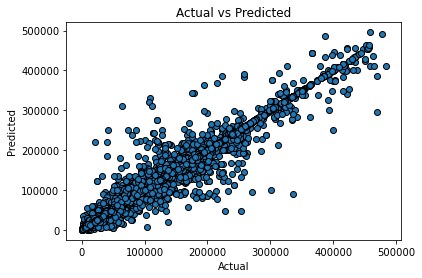

In [61]:
# So let's run the model actual values against the predicted ones 

fig, ax = plt.subplots() 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [62]:
def adjusted_r_squared(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score

test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x))

Item
Cassava                 0.945107
Maize                   0.953530
Plantains and others    0.929157
Potatoes                0.966289
Rice, paddy             0.953162
Sorghum                 0.941662
Soybeans                0.946969
Sweet potatoes          0.956306
Wheat                   0.964673
Yams                    0.961794
dtype: float64

#### Model Results & Conclusions

In [63]:
var_imp= {'imp':model.feature_importances_,'names':yield_df_onehot.columns[yield_df_onehot.columns!="hg/ha_yield"]}

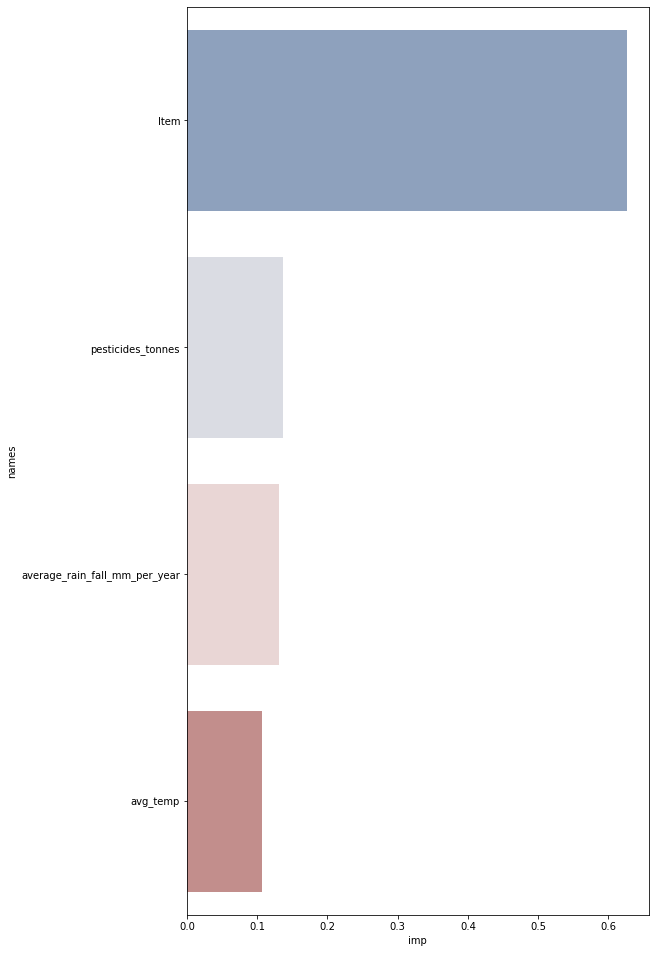

In [64]:
a4_dims = (8.27,16.7)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(var_imp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

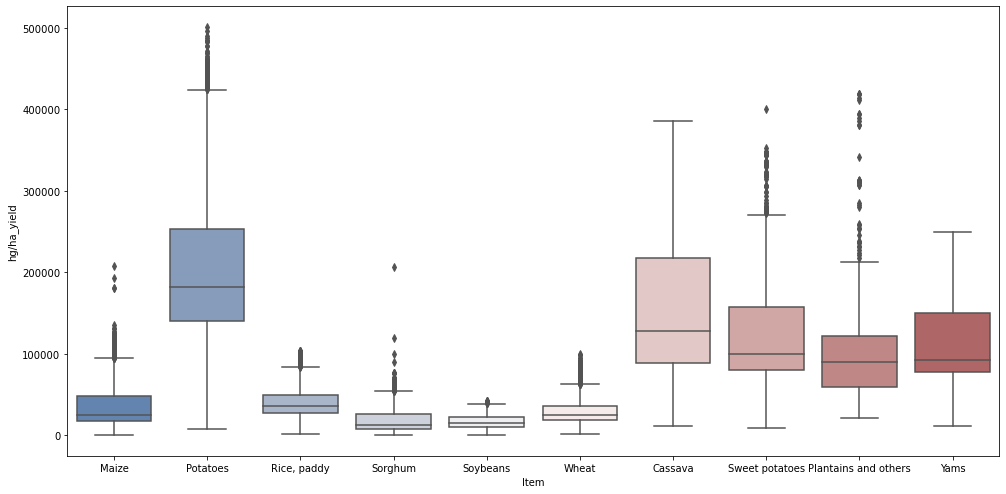

In [65]:
#Boxplot that shows yield for each item 
a4_dims = (16.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yield_df,ax=ax);

In [66]:
test_df[["Item","yield_predicted"]].head()

,Item,yield_predicted
0,Maize,72172.0
1,Potatoes,25000.0
2,"Rice, paddy",51206.0
3,Sorghum,156377.0
4,Soybeans,53407.0


In [67]:
# save the best model to file
import joblib

joblib.dump(model, 'best_model.pkl')

['best_model.pkl']

In [68]:
test_df.dtypes

average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
Country                           object
Item                              object
yield_predicted                  float64
yield_actual                       int64
dtype: object